In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

x_train_df = pd.read_csv('data/x_train.csv')
y_train_df = pd.read_csv('data/y_train.csv')
x_test_df = pd.read_csv('data/x_test.csv')

v = list()

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

word = ''
wordnum = 0
numreviews = 0
tr_text_list = x_train_df['text'].values.tolist()
te_text_list = x_test_df['text'].values.tolist()
y_train = y_train_df['is_positive_sentiment'].values.tolist()
y_arr = np.asarray(y_train)
filtered_tr = list()

word = ''
filtered_tr = [0] * 2400
i = 0
filtered_review = ''
for text in tr_text_list:
    for x in text:
        if x.isspace():
            if word not in stop_words:
                #filters reviews so that common words such as 'and' or 'the' are not included.
                filtered_review = filtered_review + ' '
                filtered_review = filtered_review + word.lower()
                word = ''
            else:
                filtered_review + ' '
                word = ''
        elif x == '.'or x == ',' or x == '!':
            #removes punctuation
            print("punctuation")
        else:
            word += x
    filtered_tr[i] = filtered_review + ' ' + word
    filtered_review = ''
    word = ''
    i += 1

filtered_arr = np.asarray(filtered_tr)

y_arr = np.asarray(y_train)

#splits up arrays so they can be combined into new testing and training arrays
x1, x2, x3 = np.array_split(filtered_arr, 3)
y1, y2, y3 = np.array_split(y_arr, 3)

#creating training sets with x
arrone = list(x1) + list(x2) #not including x3
arrtwo = list(x2) + list(x3) #not including x1
arrthree = list(x1) + list(x3) #not including x2

#creating training sets with y
yone = list(y1) + list(y2) #not including x3
ytwo = list(y2) + list(y3) #not including x1
ythree = list(y1) + list(y3) #not including x2

cv = CountVectorizer()
count_vector1=cv.fit_transform(arrone) #fitting to the training set
vector = cv.transform(x3) #creating predictions

cv2 = CountVectorizer()
count_vector2 = cv2.fit_transform(arrtwo)
vector2 = cv2.transform(x1)

cv3 = CountVectorizer()
count_vector3 = cv3.fit_transform(arrthree)
vector3 = cv3.transform(x2)

cv4 = CountVectorizer()
count_vector4 = cv4.fit_transform(filtered_arr)
vector4 = cv4.transform(te_text_list)

print(filtered_arr)

punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punc

punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punc

punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punctuation
punc

Min C is:  1.0


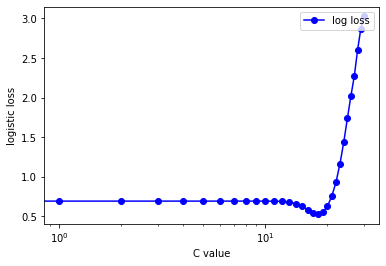

In [2]:
import sklearn.linear_model
import sklearn.metrics
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

tr_loss_list = list()
tr_C_list = list()
C_grid = np.logspace(-9, 6, 31)

for C in C_grid:
    lr = LogisticRegression(C = C, solver='liblinear').fit(count_vector1, yone)
    pp = lr.predict_proba(vector)
    ll = log_loss(y3, pp)
    tr_C_list.append(C)
    tr_loss_list.append(ll)

#finds the best C value based on for which C value the log loss is the smallest
tr_min_loss = min(tr_loss_list)
tr_min_index = tr_loss_list.index(tr_min_loss)
tr_min_C = tr_C_list[tr_min_index]
print("Min C is: ", tr_min_C)

#saves output of logistic regression to yprobal_test.txt
lr = LogisticRegression(C = tr_min_C, solver='liblinear').fit(count_vector4, y_train)
yprobal_test = lr.predict_proba(vector4)[:,1]
np.savetxt('yproba1_test.txt', yprobal_test)
import numpy as np
import matplotlib.pyplot as plt
plt.ylabel('logistic loss');
plt.xlabel('C value');
plt.plot(tr_loss_list, label="log loss", color= 'blue', marker='o')   
plt.legend(loc='upper right', frameon=True)
plt.xscale('log')

Min C is:  1.0


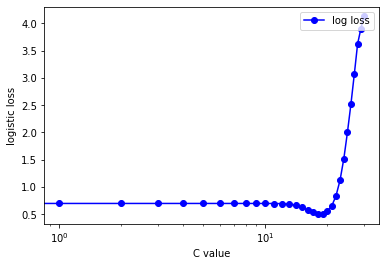

In [3]:
import sklearn.linear_model
import sklearn.metrics
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

tr_loss_list = list()
tr_C_list = list()
C_grid = np.logspace(-9, 6, 31)

for C in C_grid:
    lr = LogisticRegression(C = C, solver='liblinear').fit(count_vector2, ytwo)
    pp = lr.predict_proba(vector2)
    ll = log_loss(y1, pp)
    tr_C_list.append(C)
    tr_loss_list.append(ll)

#finds the best C value based on for which C value the log loss is the smallest
tr_min_loss = min(tr_loss_list)
tr_min_index = tr_loss_list.index(tr_min_loss)
tr_min_C = tr_C_list[tr_min_index]
print("Min C is: ", tr_min_C)

#saves output of logistic regression to yprobal_test.txt
lr = LogisticRegression(C = tr_min_C, solver='liblinear').fit(count_vector4, y_train)
yprobal_test = lr.predict_proba(vector4)[:,1]
np.savetxt('yproba1_test.txt', yprobal_test)
import numpy as np
import matplotlib.pyplot as plt
plt.ylabel('logistic loss');
plt.xlabel('C value')
plt.plot(tr_loss_list, label="log loss", color= 'blue', marker='o')   
plt.legend(loc='upper right', frameon=True)
plt.xscale('log')

Min C is:  1.0


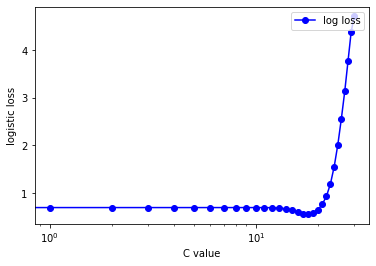

In [4]:
import sklearn.linear_model
import sklearn.metrics
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

tr_loss_list = list()
tr_C_list = list()
C_grid = np.logspace(-9, 6, 31)

for C in C_grid:
    lr = LogisticRegression(C = C, solver='liblinear').fit(count_vector3, ythree)
    pp = lr.predict_proba(vector3)
    ll = log_loss(y2, pp)
    tr_C_list.append(C)
    tr_loss_list.append(ll)

#finds the best C value based on for which C value the log loss is the smallest
tr_min_loss = min(tr_loss_list)
tr_min_index = tr_loss_list.index(tr_min_loss)
tr_min_C = tr_C_list[tr_min_index]
print("Min C is: ", tr_min_C)

#saves output of logistic regression to yprobal_test.txt
lr = LogisticRegression(C = tr_min_C, solver='liblinear').fit(count_vector4, y_train)
yprobal_test = lr.predict_proba(vector4)[:,1]
np.savetxt('yproba1_test.txt', yprobal_test)
import numpy as np
import matplotlib.pyplot as plt
plt.ylabel('logistic loss');
plt.xlabel('C value')
plt.plot(tr_loss_list, label="log loss", color= 'blue', marker='o')   
plt.legend(loc='upper right', frameon=True)
plt.xscale('log')

Min C is:  1.0


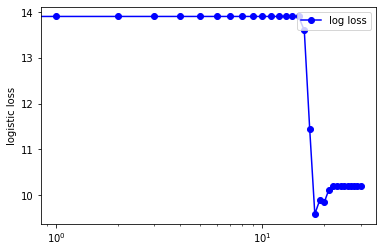

In [5]:
from sklearn import svm

tr_loss_list = list()
tr_C_list = list()
C_grid = np.logspace(-9, 6, 31)

for C in C_grid:
    clf = svm.SVC(C = C)
    test = vector
    clf.fit(count_vector1, yone)
    pp = clf.predict(vector)
    ll = log_loss(y3, pp)
    tr_C_list.append(C)
    tr_loss_list.append(ll)

#finds the best C value based on for which C value the log loss is the smallest
tr_min_loss = min(tr_loss_list)
tr_min_index = tr_loss_list.index(tr_min_loss)
tr_min_C = tr_C_list[tr_min_index]
print("Min C is: ", tr_min_C)

#saves output of svm to yprobal_test.txt
clf.fit(count_vector4, y_train)
array = clf.predict(vector4)
np.savetxt('yproba1_test.txt', array)
import numpy as np
import matplotlib.pyplot as plt
plt.ylabel('logistic loss');
plt.plot(tr_loss_list, label="log loss", color= 'blue', marker='o')   
plt.legend(loc='upper right', frameon=True)
plt.xscale('log')

Min C is:  1.0


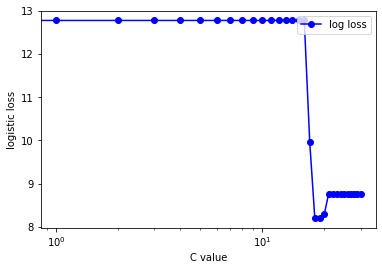

In [6]:
from sklearn import svm

tr_loss_list = list()
tr_C_list = list()
C_grid = np.logspace(-9, 6, 31)

for C in C_grid:
    clf = svm.SVC(C = C)
    test = vector
    clf.fit(count_vector2, ytwo)
    pp = clf.predict(vector2)
    ll = log_loss(y1, pp)
    tr_C_list.append(C)
    tr_loss_list.append(ll)

#finds the best C value based on for which C value the log loss is the smallest
tr_min_loss = min(tr_loss_list)
tr_min_index = tr_loss_list.index(tr_min_loss)
tr_min_C = tr_C_list[tr_min_index]
print("Min C is: ", tr_min_C)

#saves output of svm to yprobal_test.txt
clf.fit(count_vector4, y_train)
array = clf.predict(vector4)
np.savetxt('yproba1_test.txt', array)
import numpy as np
import matplotlib.pyplot as plt
plt.ylabel('logistic loss');
plt.xlabel('C value')
plt.plot(tr_loss_list, label="log loss", color= 'blue', marker='o')   
plt.legend(loc='upper right', frameon=True)
plt.xscale('log')

Min C is:  3.1622776601683795


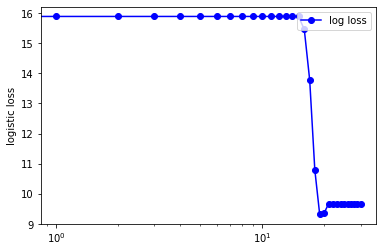

In [7]:
from sklearn import svm

tr_loss_list = list()
tr_C_list = list()
C_grid = np.logspace(-9, 6, 31)

for C in C_grid:
    clf = svm.SVC(C = C)
    test = vector
    clf.fit(count_vector3, ythree)
    pp = clf.predict(vector3)
    ll = log_loss(y2, pp)
    tr_C_list.append(C)
    tr_loss_list.append(ll)

#finds the best C value based on for which C value the log loss is the smallest
tr_min_loss = min(tr_loss_list)
tr_min_index = tr_loss_list.index(tr_min_loss)
tr_min_C = tr_C_list[tr_min_index]
print("Min C is: ", tr_min_C)

#saves output of svm to yprobal_test.txt
clf.fit(count_vector4, y_train)
array = clf.predict(vector4)
np.savetxt('yproba1_test.txt', array)

import numpy as np
import matplotlib.pyplot as plt
plt.ylabel('logistic loss');
plt.plot(tr_loss_list, label="log loss", color= 'blue', marker='o')   
plt.legend(loc='upper right', frameon=True)
plt.xscale('log')

finished SGD run  1/5 after   24.9 sec | 400 epochs | NOT converged | loss 0.004
finished SGD run  2/5 after   35.9 sec | 178 epochs | converged     | loss 0.693
finished SGD run  3/5 after   46.2 sec | 166 epochs | converged     | loss 0.693
finished SGD run  4/5 after   54.2 sec | 130 epochs | converged     | loss 0.693
finished SGD run  5/5 after   64.4 sec | 164 epochs | converged     | loss 0.693


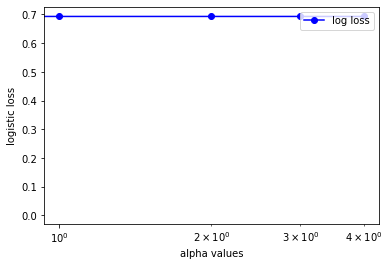

In [24]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

start_time_sec = time.time()

loss_list = list()

alpha_grid = [0, .2, .4, .6, .8, 1]

n_runs = 5
start_time_sec = time.time()
classifier_list = list()
lc_list = list()
for x in range(n_runs):
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=alpha_grid[x], #uses different values for alpha
        max_iter=400, tol=1e-8,
        random_state=x,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    classifier_list.append(mlp_sgd)
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(count_vector1, yone)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
    (x+1), n_runs, elapsed_time_sec,
    len(mlp_sgd.loss_curve_),
        'converged    ' if mlp_sgd.did_converge else 'NOT converged',
        mlp_sgd.loss_))
    lc_list.append(mlp_sgd.loss_curve_)
    loss_list.append(mlp_sgd.loss_)
    
import numpy as np
import matplotlib.pyplot as plt
plt.ylabel('logistic loss');
plt.xlabel('alpha values');
plt.plot(loss_list, label="log loss", color= 'blue', marker='o')   
plt.legend(loc='upper right', frameon=True)
plt.xscale('log')

In [ ]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

start_time_sec = time.time()

loss_list2 = list()

alpha_grid = [0, .2, .4, .6, .8, 1]

n_runs = 5
start_time_sec = time.time()
classifier_list2 = list()
lc_list2 = list()
for x in range(n_runs):
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=alpha_grid[x],
        max_iter=400, tol=1e-8,
        random_state=x,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    classifier_list.append(mlp_sgd)
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(count_vector2, ytwo)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
    (x+1), n_runs, elapsed_time_sec,
    len(mlp_sgd.loss_curve_),
        'converged    ' if mlp_sgd.did_converge else 'NOT converged',
        mlp_sgd.loss_))
    lc_list2.append(mlp_sgd.loss_curve_)
    loss_list2.append(mlp_sgd.loss_)
    
import numpy as np
import matplotlib.pyplot as plt
plt.ylabel('logistic loss');
plt.xlabel('alpha values');
plt.plot(loss_list, label="log loss", color= 'blue', marker='o')   
plt.legend(loc='upper right', frameon=True)
plt.xscale('log')

finished SGD run  1/5 after   23.9 sec | 400 epochs | NOT converged | loss 0.009
finished SGD run  2/5 after   33.2 sec | 156 epochs | converged     | loss 0.693
finished SGD run  3/5 after   41.8 sec | 144 epochs | converged     | loss 0.693
finished SGD run  4/5 after   51.5 sec | 163 epochs | converged     | loss 0.693
finished SGD run  5/5 after   57.6 sec | 103 epochs | converged     | loss 0.693


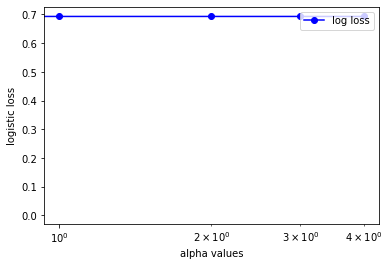

In [26]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

start_time_sec = time.time()

loss_list3 = list()

alpha_grid = [0, .2, .4, .6, .8, 1]

n_runs = 5
start_time_sec = time.time()
classifier_list3 = list()
lc_list3 = list()
for x in range(n_runs):
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=alpha_grid[x],
        max_iter=400, tol=1e-8,
        random_state=x,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    classifier_list.append(mlp_sgd)
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(count_vector3, ythree)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
    (x+1), n_runs, elapsed_time_sec,
    len(mlp_sgd.loss_curve_),
        'converged    ' if mlp_sgd.did_converge else 'NOT converged',
        mlp_sgd.loss_))
    lc_list3.append(mlp_sgd.loss_curve_)
    loss_list3.append(mlp_sgd.loss_)
    
import numpy as np
import matplotlib.pyplot as plt
plt.ylabel('logistic loss');
plt.xlabel('alpha values');
plt.plot(loss_list, label="log loss", color= 'blue', marker='o')   
plt.legend(loc='upper right', frameon=True)
plt.xscale('log')